In [58]:
import os, sys, json
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from collections import defaultdict
from tabulate import tabulate
from IPython.core.display import display, HTML

# Increase display width
display(HTML("<style>.container { width:80% !important; }</style>"))

# Some styling
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 10

In [22]:
# We reuse these over and over and it's easier to have them in a list than unordered dict
model_names = ["wgan", "wgpgan", "nsgan", "mmgan", "ragan", 
               "lsgan", "dragan", "began", "infogan", "fishergan", 
               "fgan_forward_kl", "fgan_reverse_kl", "fgan_jensen_shannon",
               "fgan_total_var", "fgan_hellinger", "fgan_pearson"]
distance_metrics=["KL-Divergence", "Jensen-Shannon", "Wasserstein-Distance"]#, "Energy-Distance"]
distributions=['normal', 'beta', 'gumbel', 'laplace', 'exponential', 'gamma']

# Colors
palette = ["#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", "#98df8a", "#d62728", "#ff9896", "#9467bd",
            "#c5b0d5", "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", "#c7c7c7", "#bcbd22" "#dbdb8d",
            "#17becf", "#9edae5"]

# For subplotting
plt_idx = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

    
def graph_multivariate(optimal, 
                       omit_outliers=True,
                       thresh=8.5,
                       plt_idx=plt_idx,
                       model_names=model_names,
                       distance_metrics=distance_metrics,
                       distributions=distributions,
                       palette=palette):
    
    for metric in distance_metrics:

        fig, axes = plt.subplots(2, 3, sharex=True, sharey=False, figsize=(20,20))

        for d_idx, distribution in enumerate(distributions):

            for idx, model_name in enumerate(model_names):

                if model_name in ['vae', 'autoencoder']:
                    continue
                    
                data = optimal[model_name][distribution][metric]['mean']
                
                if omit_outliers:
                    # Remove outliers
                    data = np.array(data)
                    notnan_indexes = ~np.isnan(data)
                    no_outliers = data.flatten()[~is_outlier(data[notnan_indexes], thresh=thresh)]

                    axes[plt_idx[d_idx][0], plt_idx[d_idx][1]].plot(np.linspace(1, data.shape[0]+1, no_outliers.shape[0]),
                                                                     no_outliers,
                                                                     label=model_name,
                                                                     c=palette[idx])
                    
                else:

                    axes[plt_idx[d_idx][0], plt_idx[d_idx][1]].plot(range(1, len(data)+1),
                                                                     data,
                                                                     c=palette[idx],
                                                                     label=model_name)
                
                axes[plt_idx[d_idx][0], plt_idx[d_idx][1]].set_title("{0}".format(distribution.capitalize()))
            
            
        fig.suptitle("{0}".format(metric), x=0.5, y=0.93, fontsize=18)
        fig.text(0.5, 0.08, "Epoch", ha='center', fontsize=16)
        plt.legend(loc='center left', bbox_to_anchor=(1, 1), fontsize=18)
        plt.show()
#         plt.savefig('../graphs/multivariate/{0}_{1}_{2}.png'.format(metric, dims, samples), dpi=100)

def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh


def nested_pickle_dict():
    """ Picklable defaultdict nested dictionaries """
    return defaultdict(nested_pickle_dict)


def mean_confidence_interval(data, axis=1, confidence=0.95):
    try:
        n = data.shape[axis]
    except IndexError:
        axis = 0
        n = data.shape[axis]

    mu, std = np.nanmean(data, axis=axis), scipy.stats.sem(data, axis=axis, nan_policy='omit')
    h = np.ma.getdata(std) * scipy.stats.t.ppf((1 + confidence) / 2., n-1)       

    return mu, h, mu-h, mu+h


def load_best(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
        
    return data

In [46]:
optimal_1000 = load_best('/Users/sob/Desktop/gan_results/best_hyper/multivariate/128_dims_1000_samples/data.json')
optimal_10000 = load_best('/Users/sob/Desktop/gan_results/best_hyper/multivariate/128_dims_10000_samples/data.json')
optimal_100000 = load_best('/Users/sob/Desktop/gan_results/best_hyper/multivariate/128_dims_100000_samples/data.json')

 Plot mean performance across epochs for 1k samples


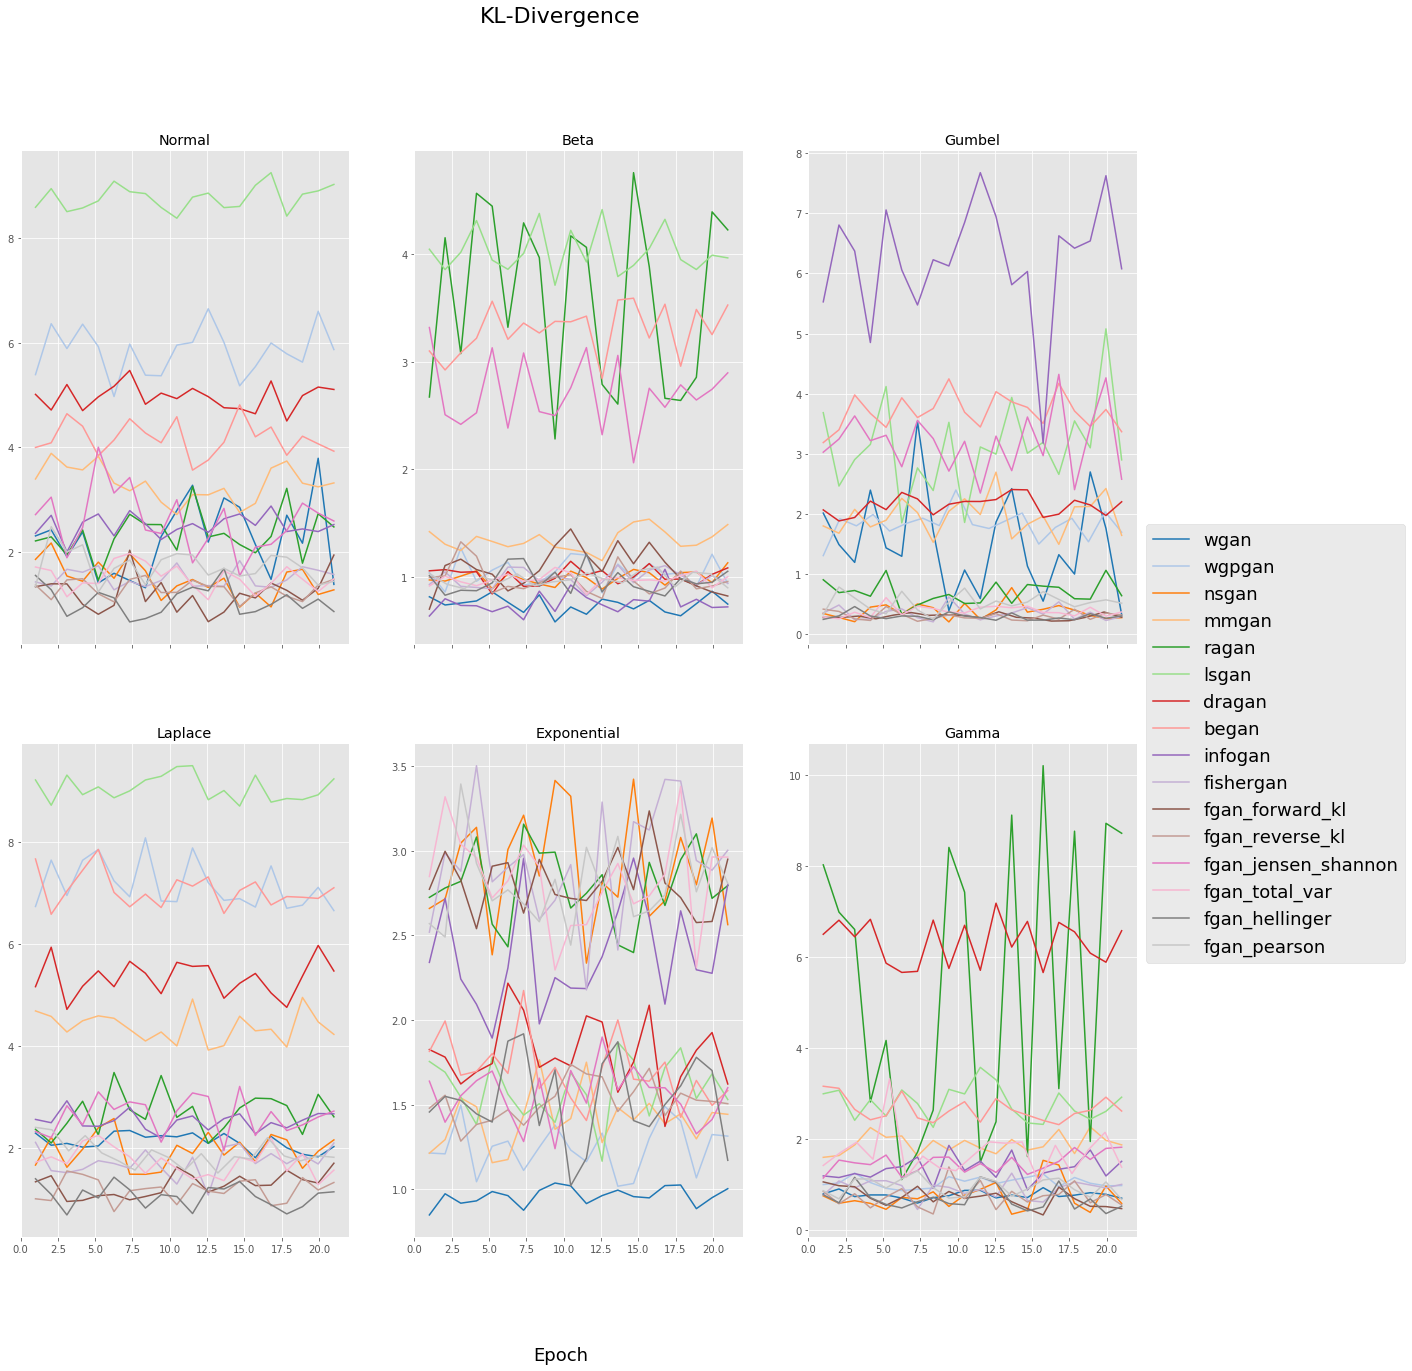

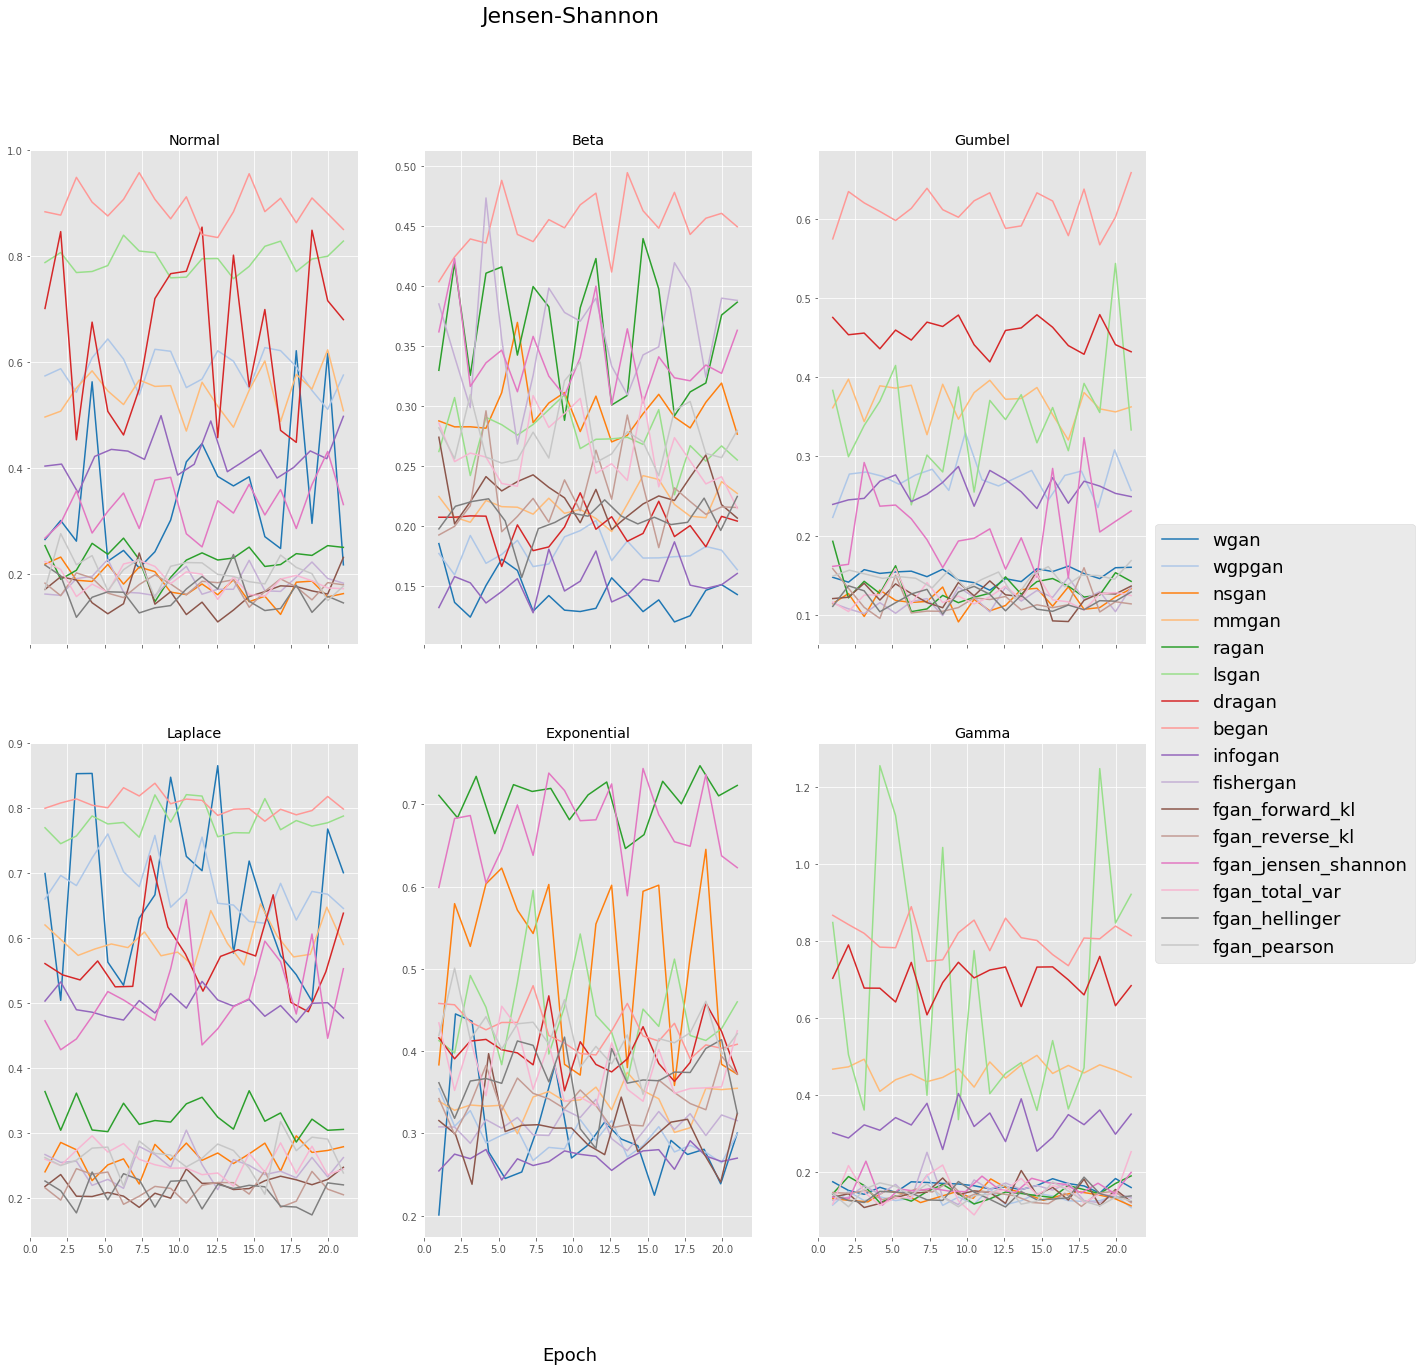

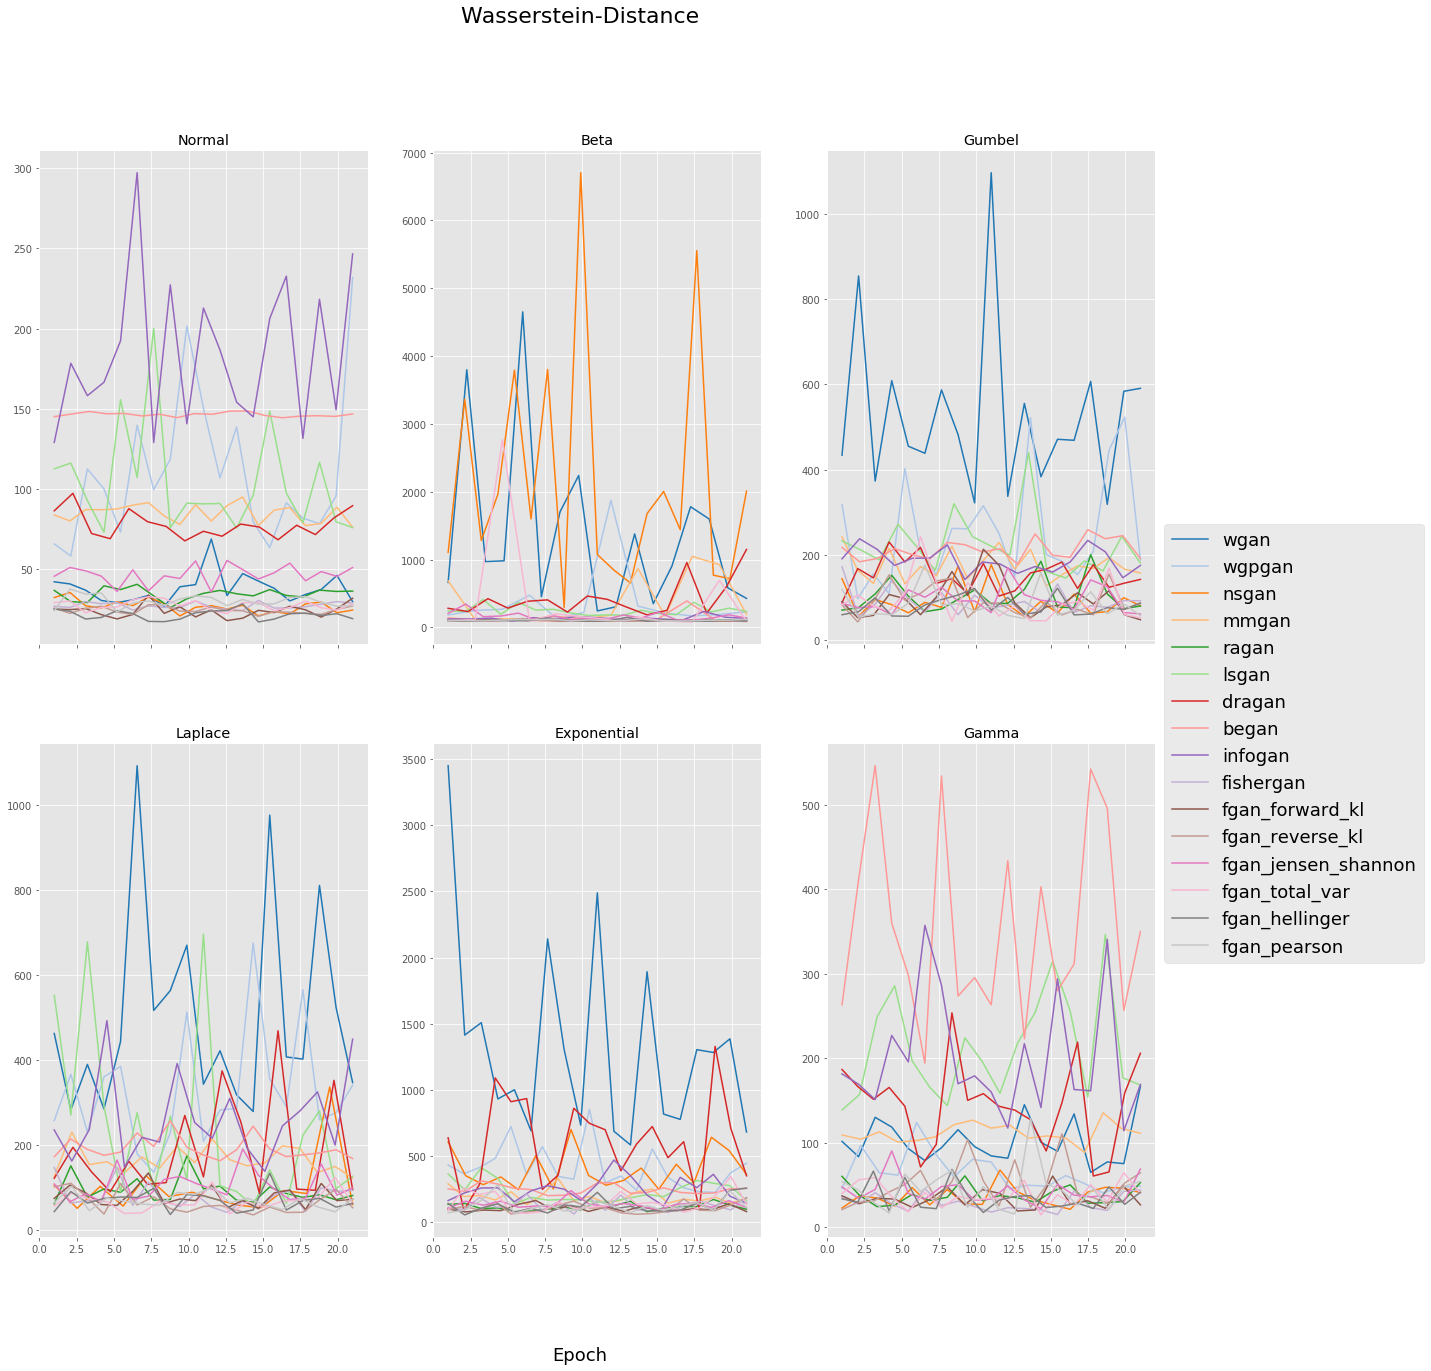

In [57]:
print(""" Plot mean performance across epochs for 1k samples""")
# graph_multivariate(optimal_1000, omit_outliers=True, thresh=4.5)

 Plot mean performance across epochs for 10k samples


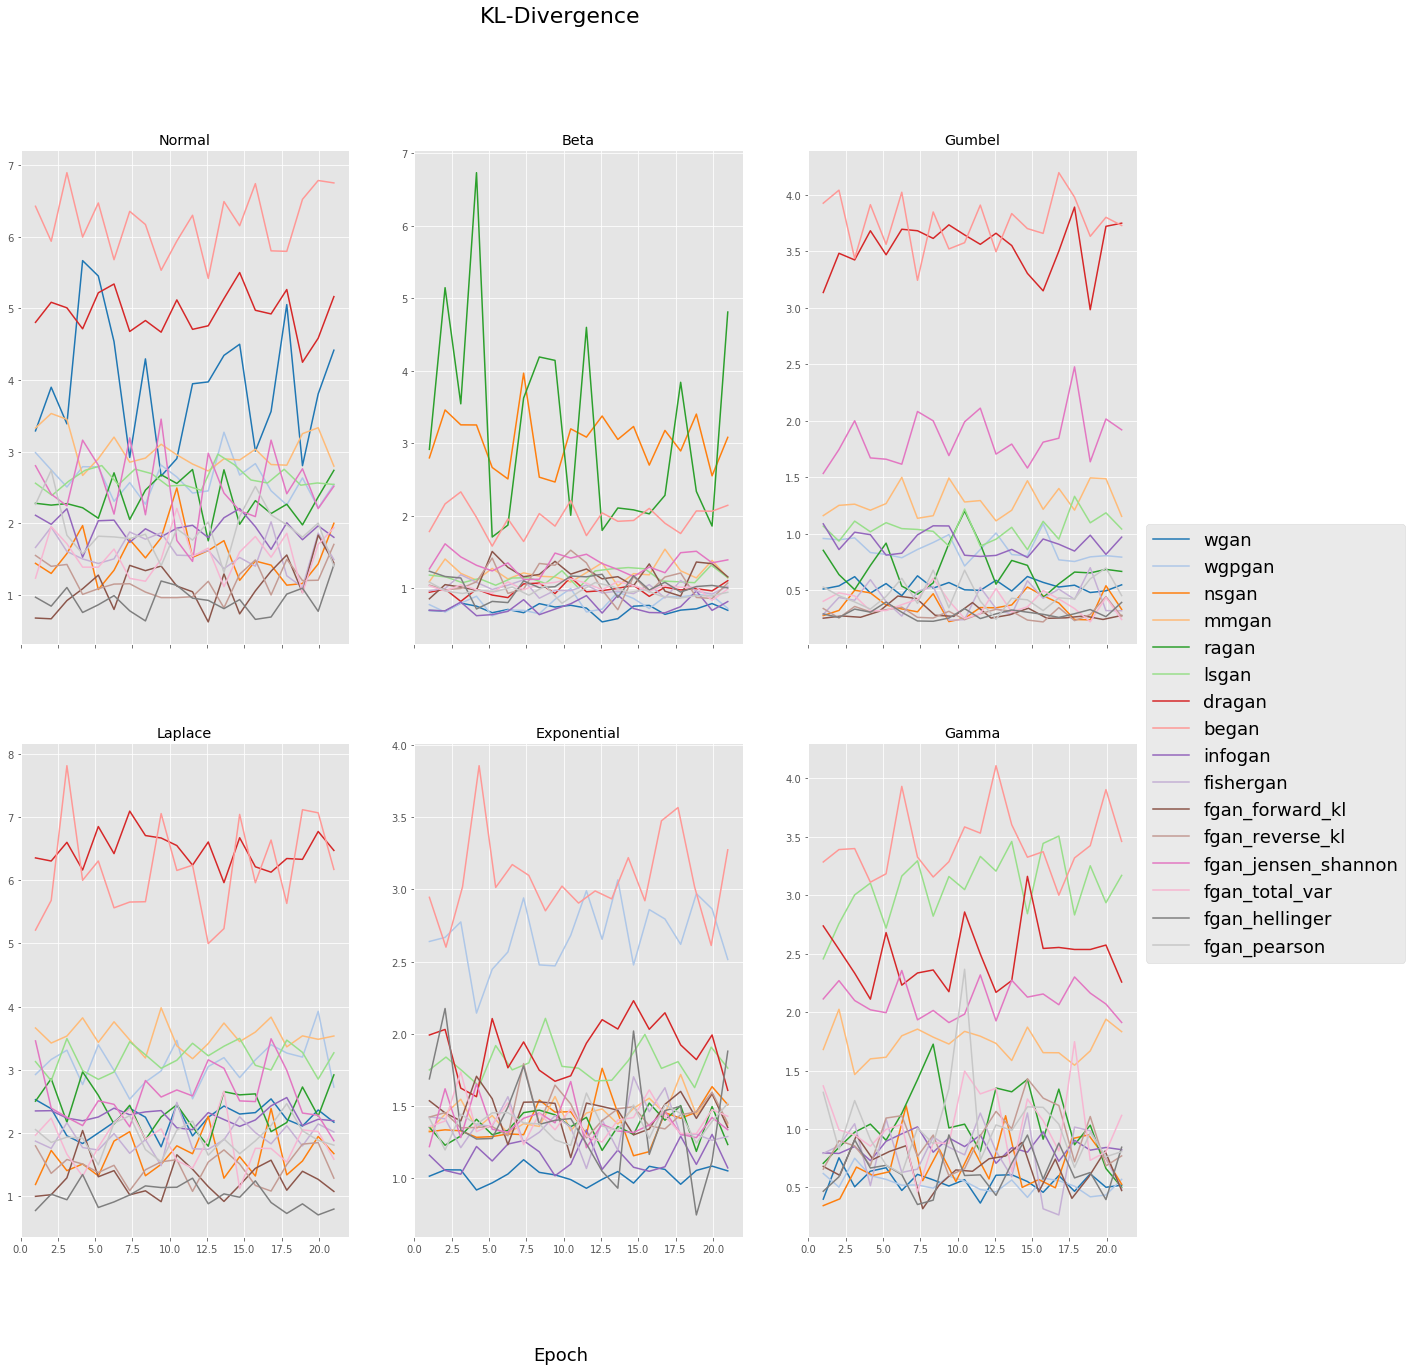

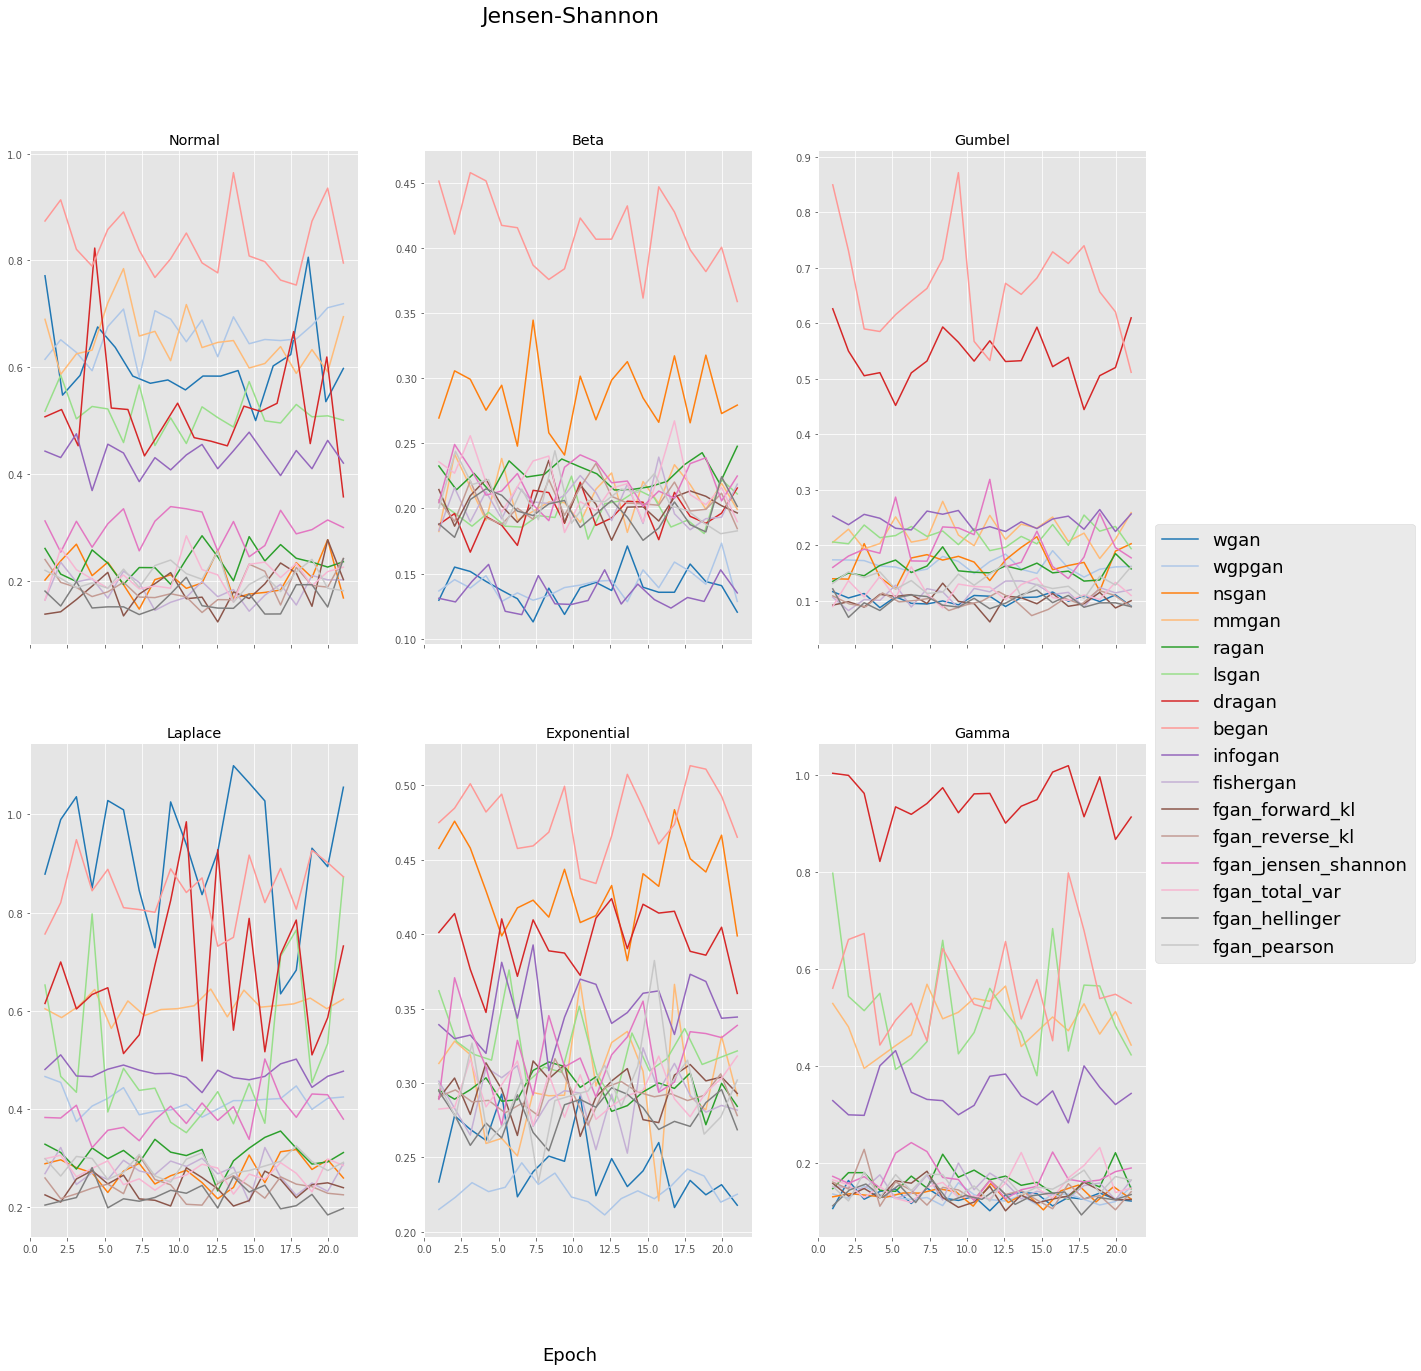

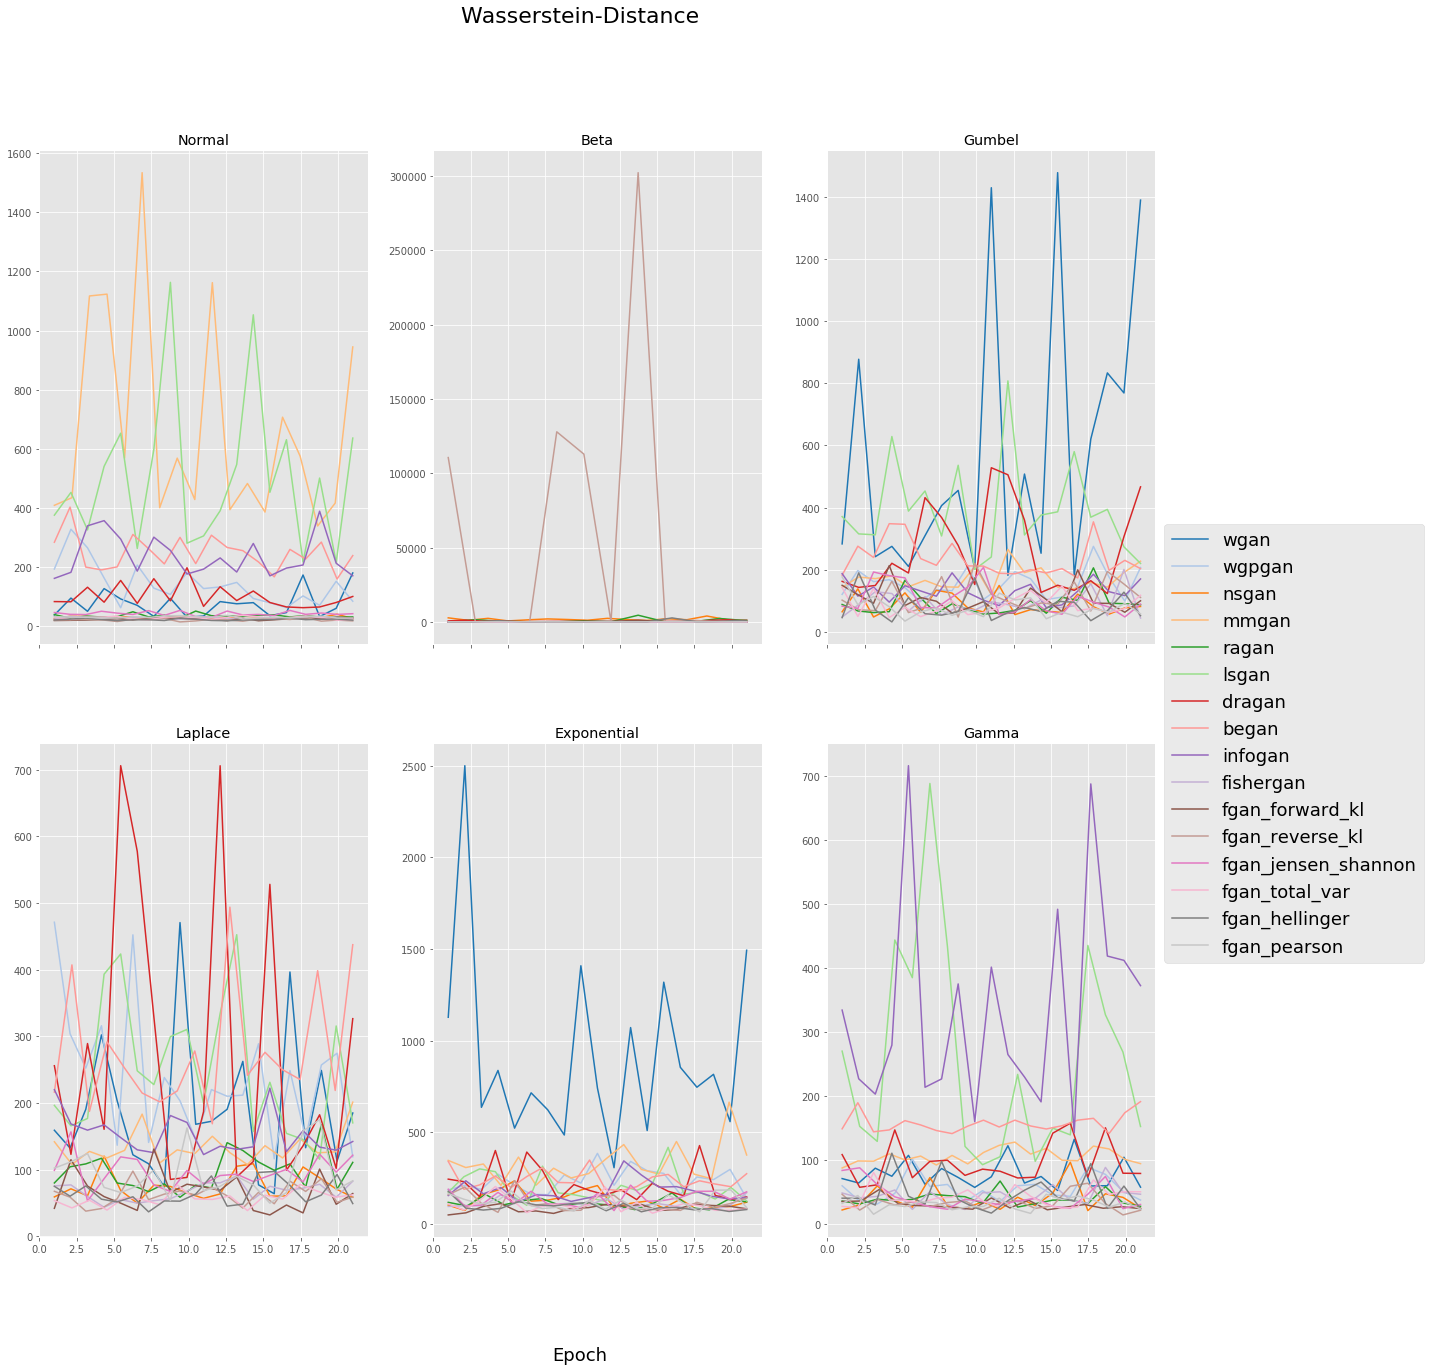

In [48]:
print(""" Plot mean performance across epochs for 10k samples""")
# graph_multivariate(optimal_10000, omit_outliers=True, thresh=4.5)

 Plot mean performance across epochs for 100k samples


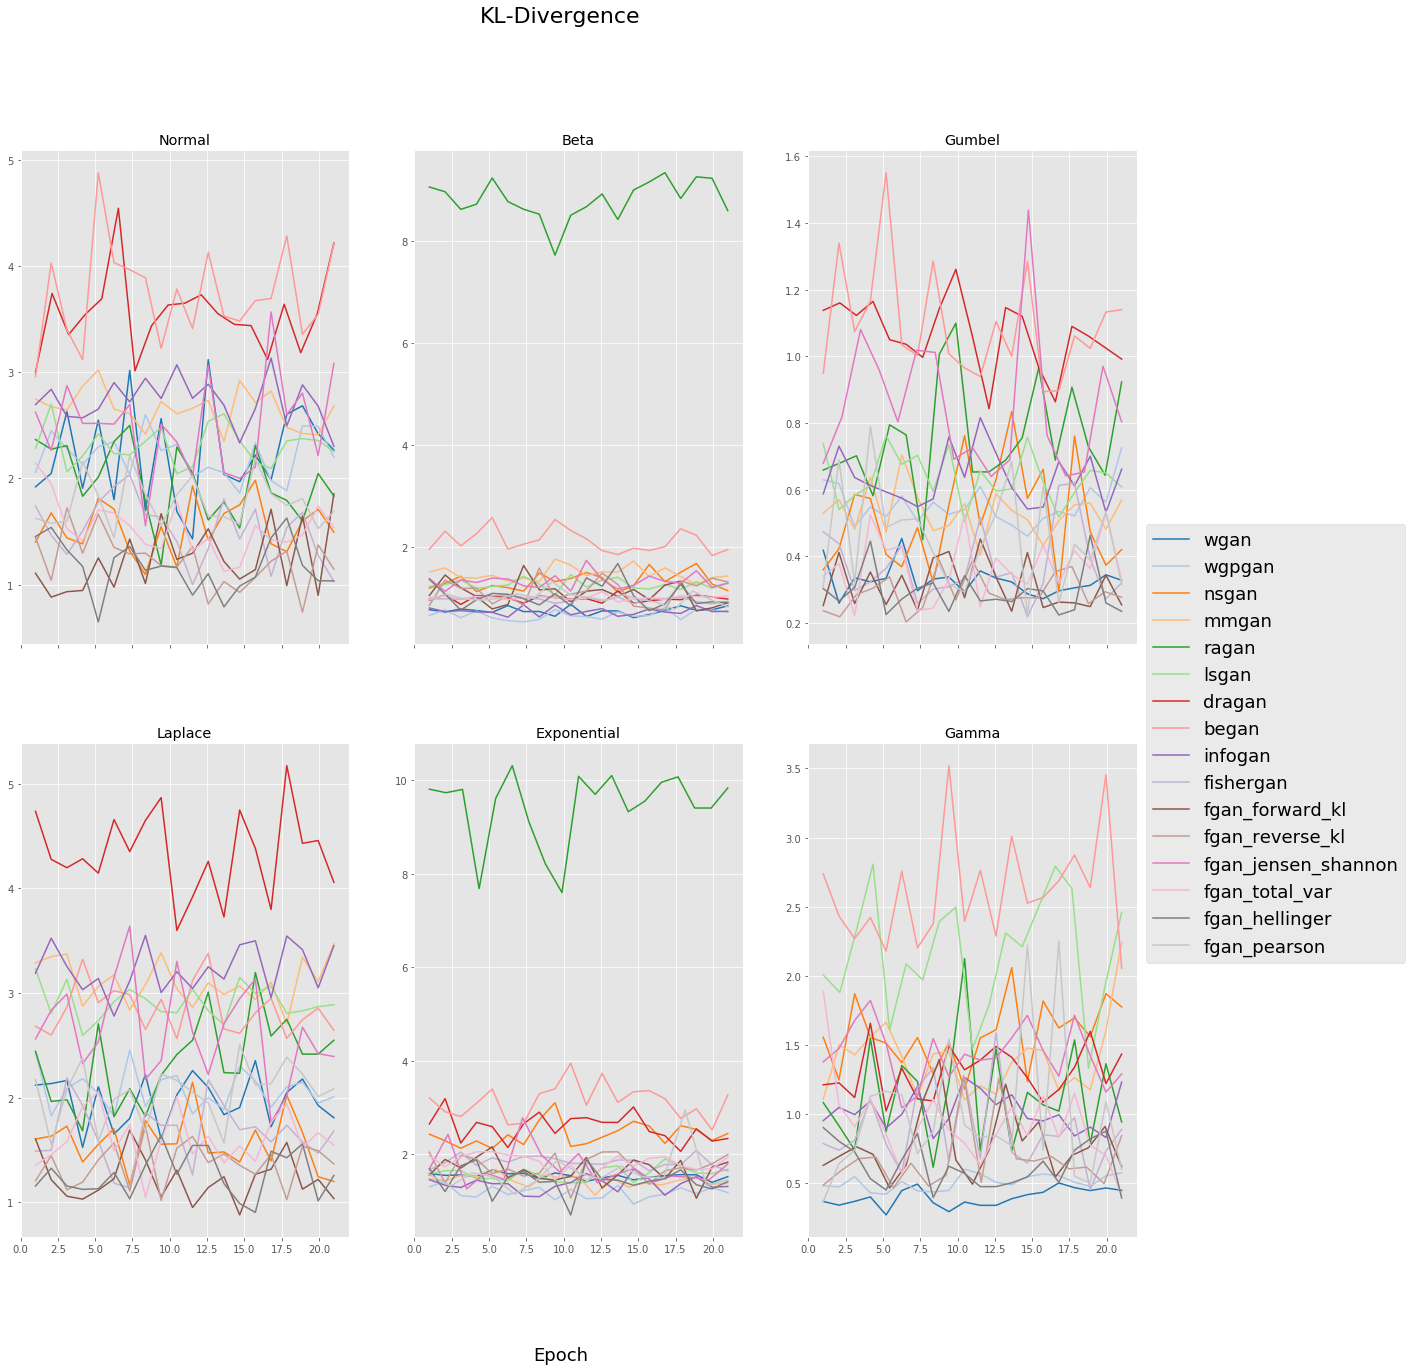

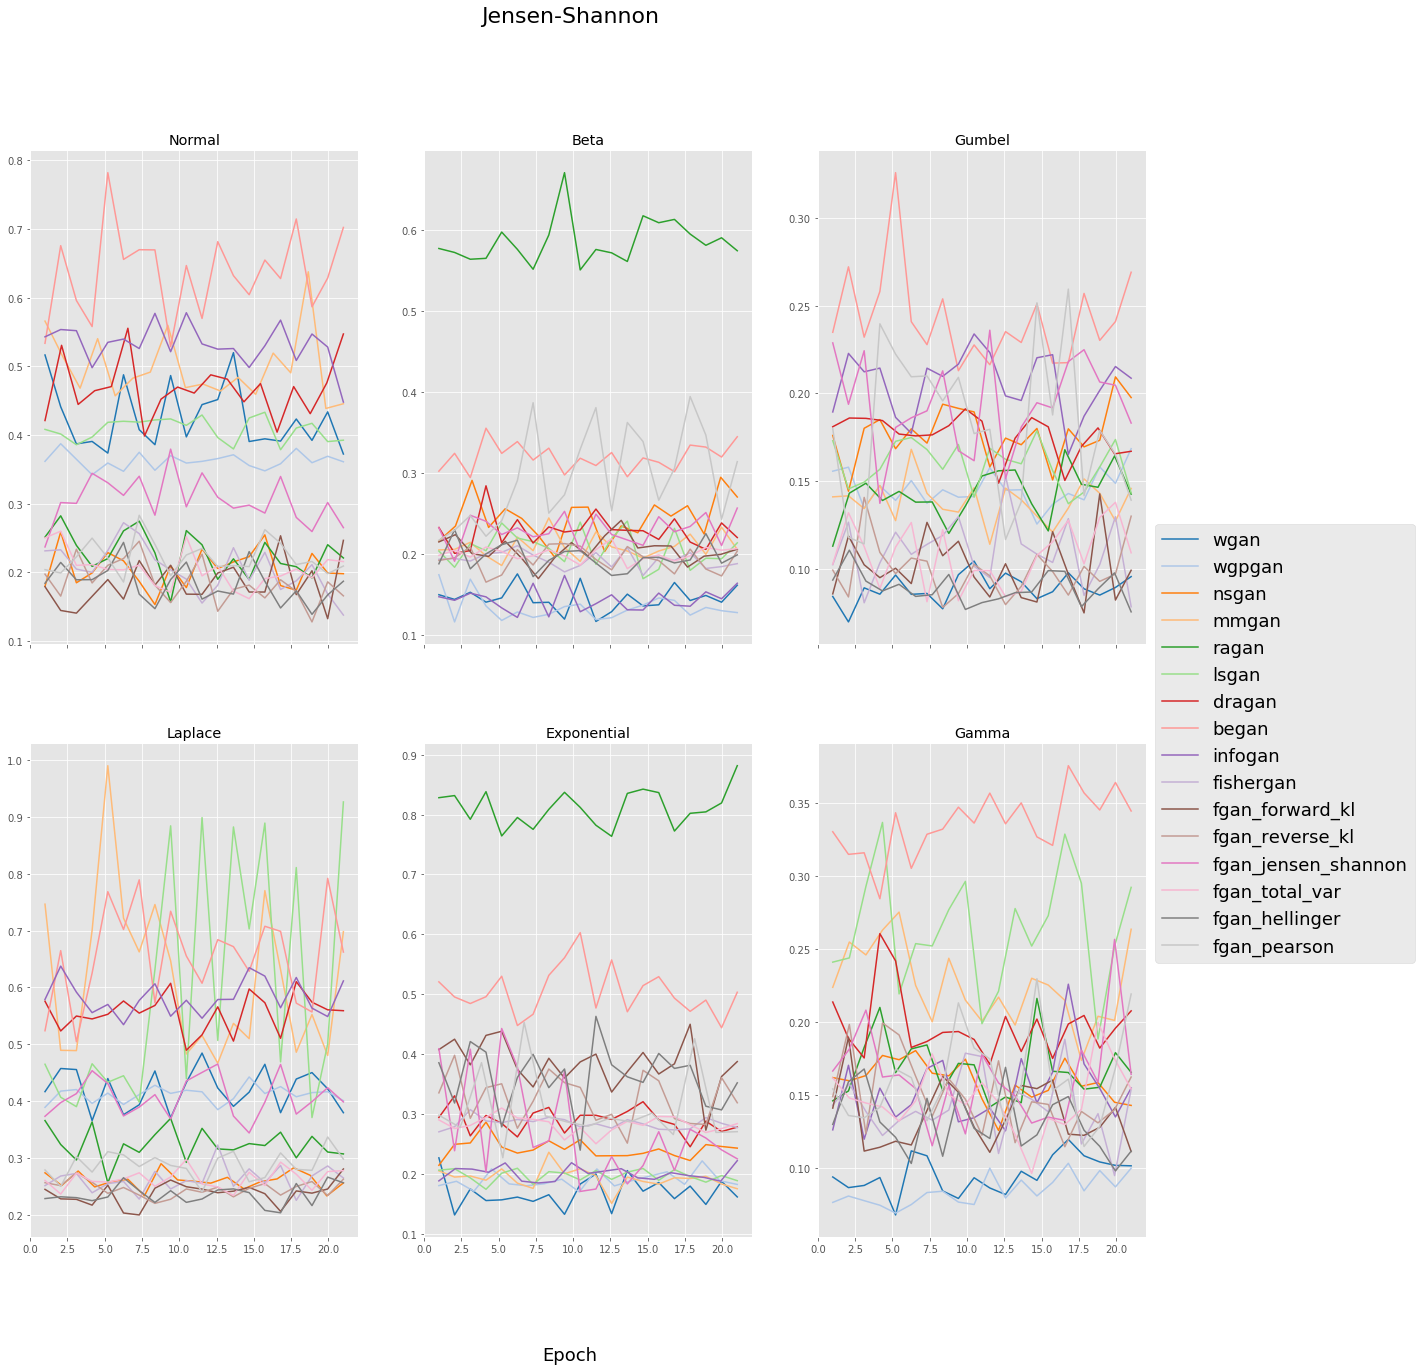

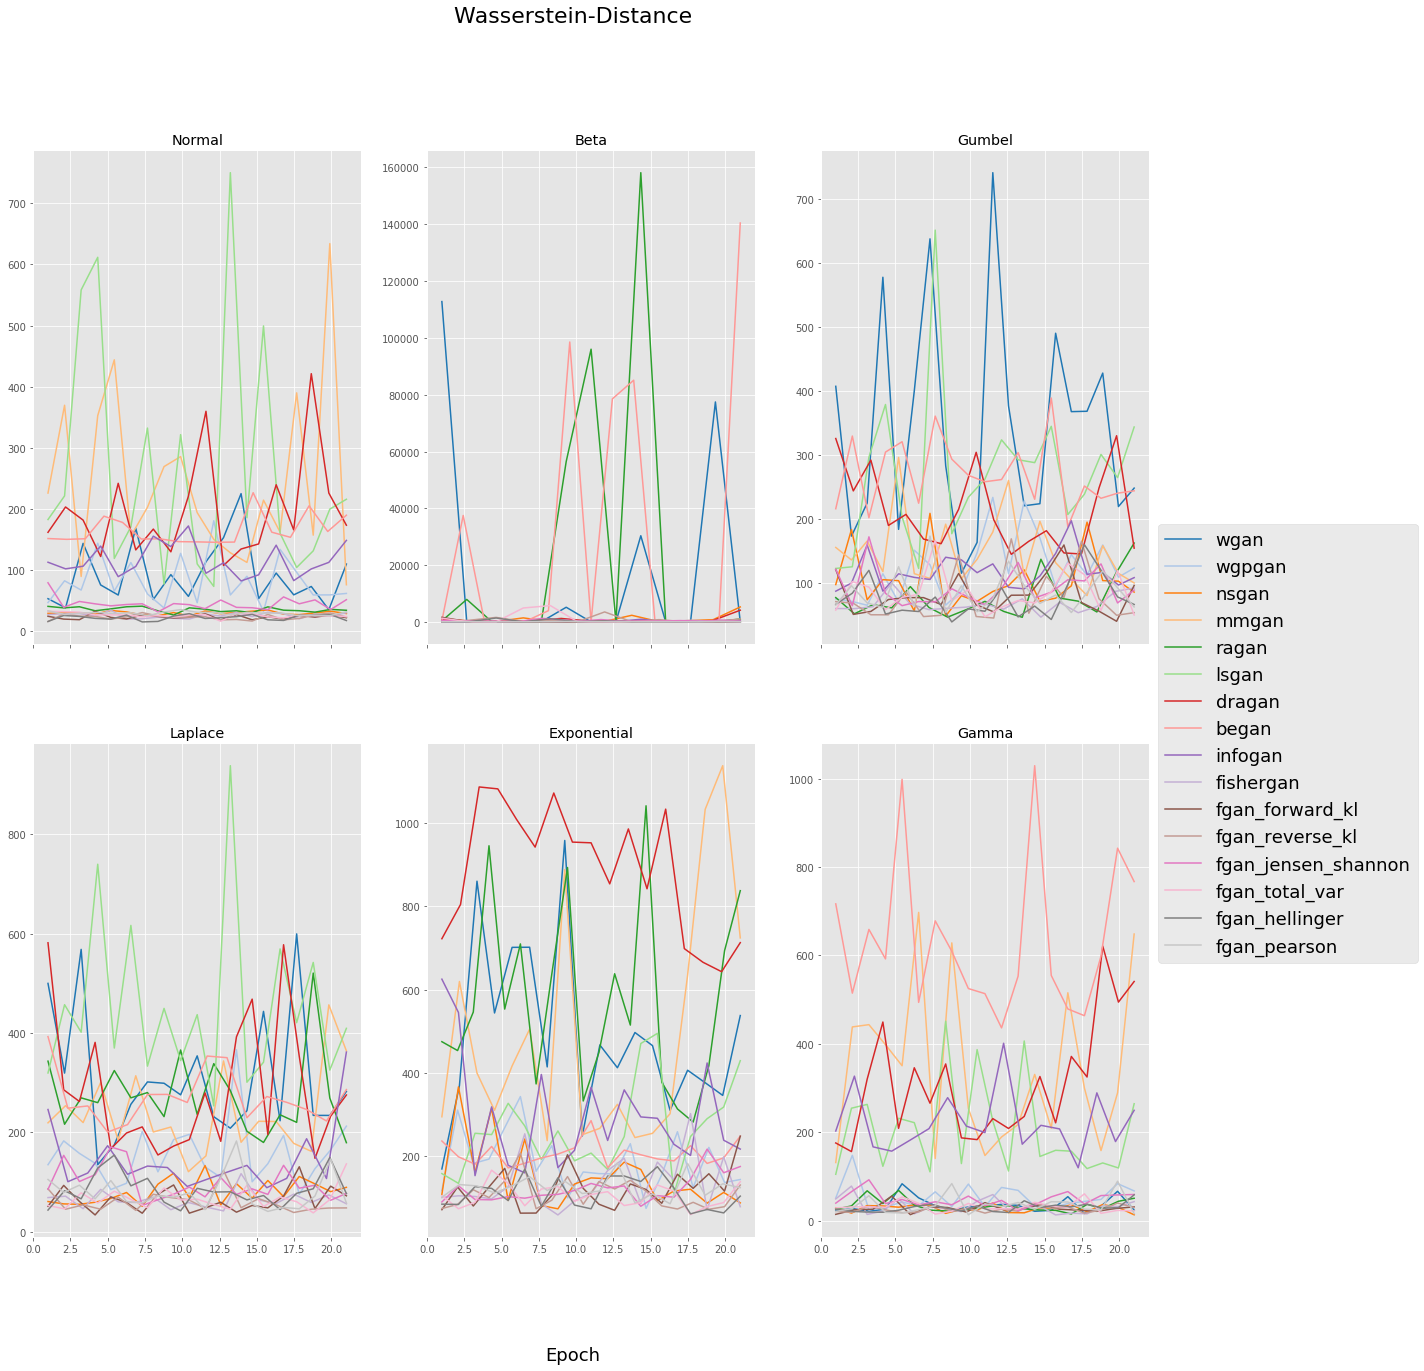

In [49]:
print(""" Plot mean performance across epochs for 100k samples""")
# graph_multivariate(optimal_100000, omit_outliers=True, thresh=4.5)

In [114]:
# print(""" Print confidence intervals for minimum across all runs """)
optimal_1000 = load_best('/Users/sob/Desktop/gan_results/best_hyper/multivariate/128_dims_1000_samples/data.json')
optimal_10000 = load_best('/Users/sob/Desktop/gan_results/best_hyper/multivariate/128_dims_10000_samples/data.json')
optimal_100000 = load_best('/Users/sob/Desktop/gan_results/best_hyper/multivariate/128_dims_100000_samples/data.json')

rankings_dict = nested_pickle_dict()
param_dict = nested_pickle_dict()

for metric in distance_metrics:
    
#     print('\n======================')
#     print('{0}'.format(metric))
#     print('======================\n')
        
    for samples, optimal in [(1000, optimal_1000), (10000, optimal_10000), (100000, optimal_100000)]:
        
#         print('\n{0} Samples \n'.format(samples))

        for distribution in distributions:

            for model_name in model_names:
                
                minimums = np.nanmin(np.array(optimal[model_name][distribution][metric]['values']), axis=1)
                mu, h, low, high = mean_confidence_interval(minimums)
                param_dict[metric][model_name][distribution][samples] = '%.3f ± %.3f' % (np.round(mu, 3), np.round(h, 3))
        
        data = [[key, param_dict[metric][key]['normal'][samples], param_dict[metric][key]['beta'][samples], 
                      param_dict[metric][key]['gumbel'][samples], param_dict[metric][key]['laplace'][samples], 
                      param_dict[metric][key]['exponential'][samples], param_dict[metric][key]['gamma'][samples]]
                 for key in model_names]
#         print(tabulate(data, headers=['Model', 'Normal', 'Beta', 'Gumbel', 'Laplace', 'Exponential', 'Gamma'], tablefmt='fancy_grid'), '\n')
        
        rankings = np.argsort([[eval(i[:4]) if i[:4] != 'nan ' else 1e10 for i in j[1:]] for j in data], axis=0)
        
        for j in range(rankings.shape[1]):
            for idx, name in enumerate(rankings[:, j]):
                if model_names[name] not in rankings_dict[metric][distributions[j]]:
                    rankings_dict[metric][distributions[j]][model_names[name]] = []
                rankings_dict[metric][distributions[j]][model_names[name]].append(idx)

In [115]:
print(""" Print confidence intervals for minimum across all runs """)

for metric in distance_metrics:
    
#     print('\n======================')
#     print('{0}'.format(metric))
#     print('======================\n')
                
    for distribution in distributions:
        
        for model_name in model_names:
            
            param_dict[metric][model_name][distribution]['performance'] = ''
        
            for samples, optimal in [(1000, optimal_1000), (10000, optimal_10000), (100000, optimal_100000)]:
                        
                minimums = np.nanmin(np.array(optimal[model_name][distribution][metric]['values']), axis=1)
                mu, h, low, high = mean_confidence_interval(minimums)
                param_dict[metric][model_name][distribution]['performance'] += '%.3f ± %.3f\n' % (np.round(mu, 3), np.round(h, 3))
        
    data = [[key, param_dict[metric][key]['normal']['performance'], param_dict[metric][key]['beta']['performance'], 
                  param_dict[metric][key]['gumbel']['performance'], param_dict[metric][key]['laplace']['performance'], 
                  param_dict[metric][key]['exponential']['performance'], param_dict[metric][key]['gamma']['performance']]
             for key in model_names]
#     print(tabulate(data, headers=['Model', 'Normal', 'Beta', 'Gumbel', 'Laplace', 'Exponential', 'Gamma'], tablefmt='fancy_grid'), '\n')

 Print confidence intervals for minimum across all runs 


In [116]:
# print(""" Get relative ranking performance based on mean minimum performance\n """)


# print('0 is the best performance.\n1st entry: 1k samples, 2nd: 10k, 3rd: 100k \n')
# for metric in distance_metrics:
#     print('========{0}=======\n'.format(metric))
    
#     print(tabulate([[key, rankings_dict[metric]['normal'][key], rankings_dict[metric]['beta'][key], rankings_dict[metric]['gumbel'][key],
#                           rankings_dict[metric]['laplace'][key], rankings_dict[metric]['exponential'][key], rankings_dict[metric]['gamma'][key]] 
#                     for key in model_names], 
#                    headers=['Model', 'Normal', 'Beta', 'Gumbel', 'Laplace', 'Exponential', 'Gamma']), '\n')

 Plot mean minimum performance with error bars as a function of number samples 


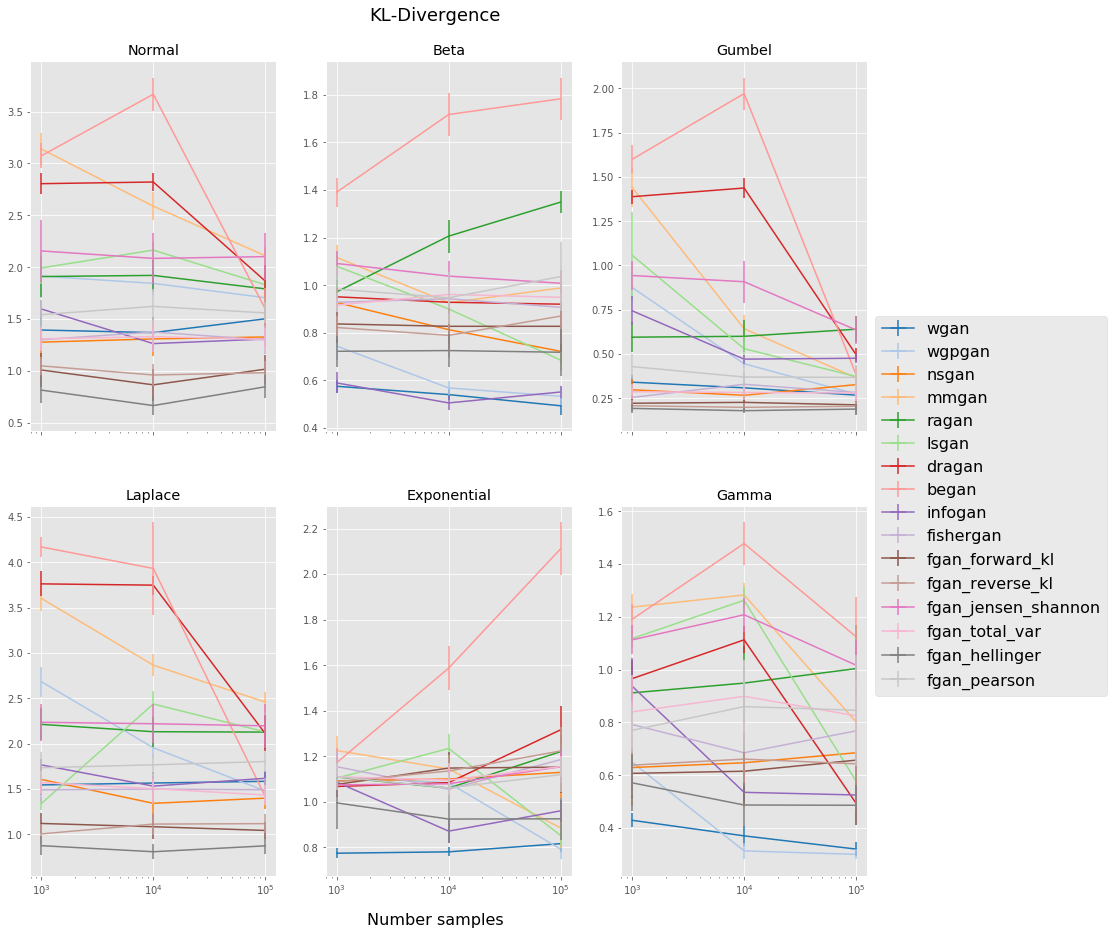

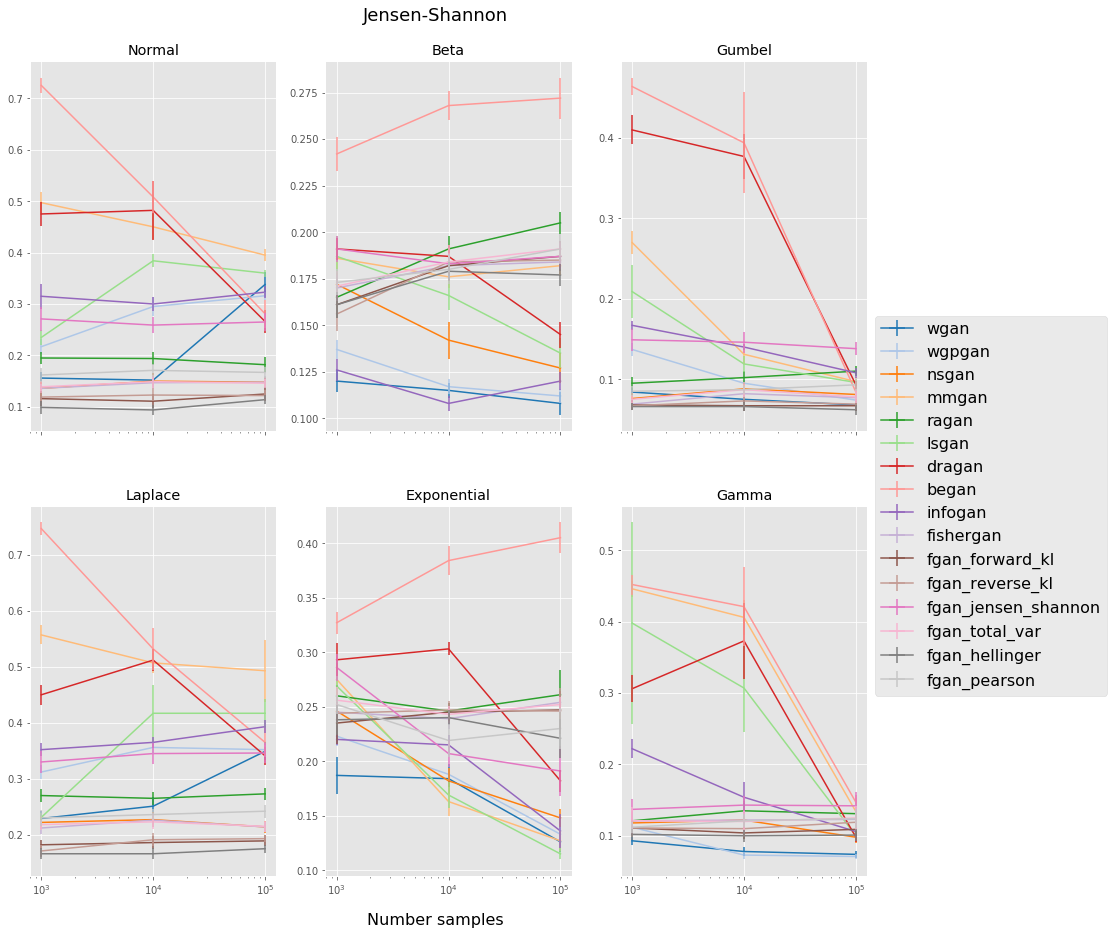

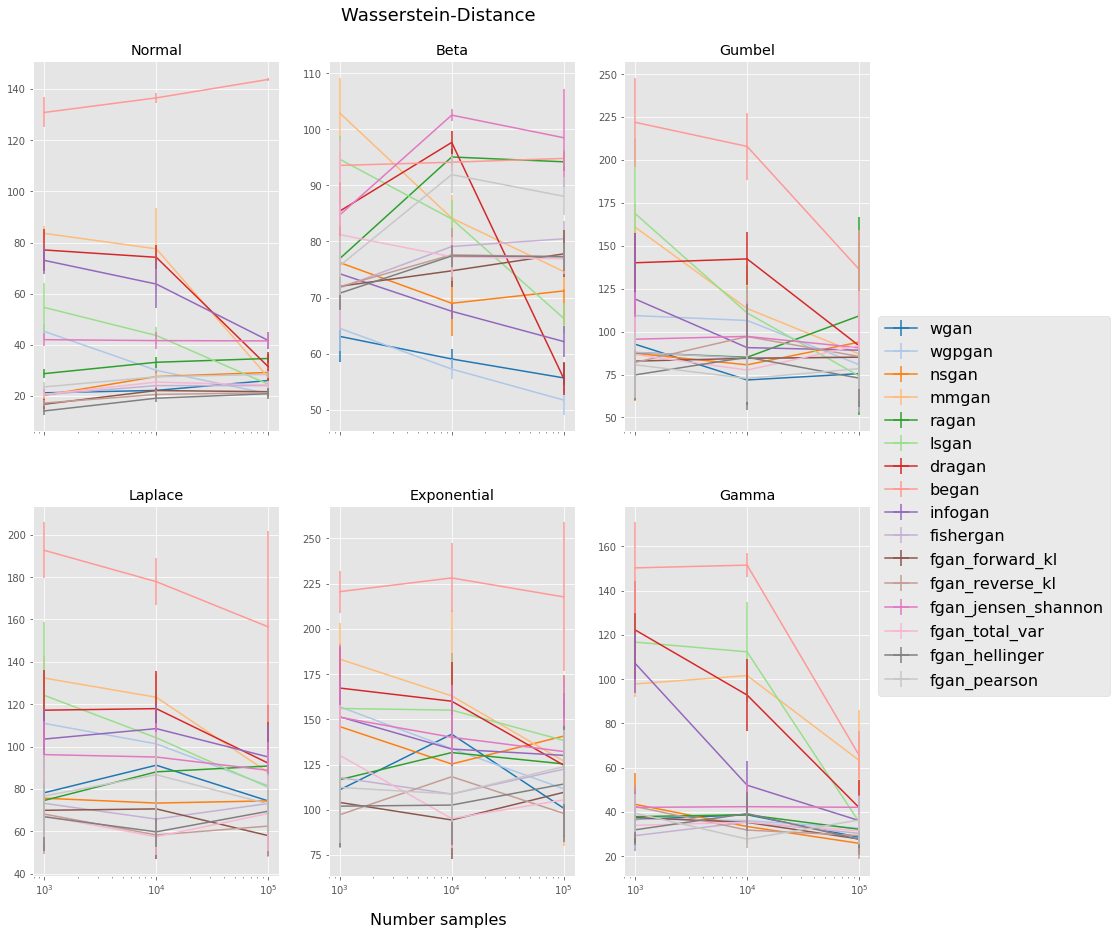

In [117]:
print(""" Plot mean minimum performance with error bars as a function of number samples """)

for metric in distance_metrics:
    
    fig, axes = plt.subplots(2, 3, sharex=True, sharey=False, figsize=(15,15))
                
    for d_idx, distribution in enumerate(distributions):

        for idx, model_name in enumerate(model_names):

            x, y, yerr = [], [], []
            for key, val in param_dict[metric][model_name][distribution].items():
                if key == 'performance':
                    continue

                mu, err = val.split('±')
                x.append(float(key)), y.append(float(mu)), yerr.append(float(err))

            axes[plt_idx[d_idx][0], plt_idx[d_idx][1]].errorbar(x, y, xerr=0, yerr=yerr,
                                                                  barsabove=True, label=model_name,
                                                                  c=palette[idx], ecolor=palette[idx])
            axes[plt_idx[d_idx][0], plt_idx[d_idx][1]].set_title("{0}".format(distribution.capitalize()))

    plt.xscale('log')
    fig.suptitle("{0}".format(metric), x=0.5, y=0.93, fontsize=18)
    fig.text(0.5, 0.08, "Number samples", ha='center', fontsize=16)
    plt.legend(loc='center left', bbox_to_anchor=(1, 1), fontsize=16)
    plt.savefig('../graphs/multivariate/samplesfnc_{0}_{1}_.png'.format(metric, 128), dpi=100)
    plt.show()
    print('\n')

In [72]:
print(""" Get number hyperparameter settings """)
print('1st entry: 1k samples, 2nd: 10k, 3rd: 100k')
print('Format: learning rate, hidden dim, bsize')


for metric in distance_metrics:
    
    print('\n======================')
    print('{0}'.format(metric))
    print('======================\n')
                
    for distribution in distributions:
        
        for model_name in model_names:
                    
            for samples, optimal in [(1000, optimal_1000), (10000, optimal_10000), (100000, optimal_100000)]:
                
                if 'params' not in param_dict[model_name][distribution][metric]:
                    param_dict[model_name][distribution][metric]['params'] = ''
                
                param_dict[model_name][distribution][metric]['params'] += ('_'.join([str(i) for i in optimal[model_name][distribution][metric]['parameters']]) + '\n')
        
    print(tabulate([[key, param_dict[key]['normal'][metric]['params'], param_dict[key]['beta'][metric]['params'], param_dict[key]['gumbel'][metric]['params'],
                          param_dict[key]['laplace'][metric]['params'], param_dict[key]['exponential'][metric]['params'], param_dict[key]['gamma'][metric]['params']]
                     for key in model_names],
                    headers=['Model', 'Normal', 'Beta', 'Gumbel', 'Laplace', 'Exponential', 'Gamma'], tablefmt='fancy_grid'))

 Get number hyperparameter settings 
1st entry: 1k samples, 2nd: 10k, 3rd: 100k
Format: learning rate, hidden dim, bsize

KL-Divergence

╒═════════════════════╤══════════════════╤═════════════════╤══════════════════╤══════════════════╤══════════════════╤══════════════════╕
│ Model               │ Normal           │ Beta            │ Gumbel           │ Laplace          │ Exponential      │ Gamma            │
╞═════════════════════╪══════════════════╪═════════════════╪══════════════════╪══════════════════╪══════════════════╪══════════════════╡
│ wgan                │ 0.05_512_512     │ 0.002_64_128    │ 0.1_512_256      │ 0.00025_512_1024 │ 0.00025_256_1024 │ 0.001_64_256     │
│                     │ 0.025_512_1024   │ 0.002_32_128    │ 0.0025_32_1024   │ 0.00025_512_1024 │ 0.00025_128_1024 │ 0.001_32_256     │
│                     │ 0.00025_128_1024 │ 0.002_64_128    │ 0.0025_32_1024   │ 0.00025_256_1024 │ 0.00025_64_1024  │ 0.0005_32_512    │
├─────────────────────┼──────────────────